In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [37]:
df = pd.read_csv('C:\iBridge\VS Code Projects\AIT\Personal_Training\crop_system\Crop_recommendation.csv')

print(df.head(10))

print('Shape of the dataset:', df.shape)
print('Columns in the dataset:', df.columns)

print('\nDataset information:')
print(df.info())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
5  69  37  42    23.058049  83.370118  7.073454  251.055000  rice
6  69  55  38    22.708838  82.639414  5.700806  271.324860  rice
7  94  53  40    20.277744  82.894086  5.718627  241.974195  rice
8  89  54  38    24.515881  83.535216  6.685346  230.446236  rice
9  68  58  38    23.223974  83.033227  6.336254  221.209196  rice
Shape of the dataset: (2200, 8)
Columns in the dataset: Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns

In [38]:
x = df.drop('label', axis=1)
y = df['label']

print('\n Input features (X):')
print(x.head())

print('\n Target variables (y):', y.head())


 Input features (X):
    N   P   K  temperature   humidity        ph    rainfall
0  90  42  43    20.879744  82.002744  6.502985  202.935536
1  85  58  41    21.770462  80.319644  7.038096  226.655537
2  60  55  44    23.004459  82.320763  7.840207  263.964248
3  74  35  40    26.491096  80.158363  6.980401  242.864034
4  78  42  42    20.130175  81.604873  7.628473  262.717340

 Target variables (y): 0    rice
1    rice
2    rice
3    rice
4    rice
Name: label, dtype: object


In [39]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

print('Training set size: ', X_train.shape)
print('Test set size: ', X_test.shape)

Training set size:  (1760, 7)
Test set size:  (440, 7)


In [40]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

print('Model training compeleted.')

Model training compeleted.


Model accuracy: 99.32 %

 Classification report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.0

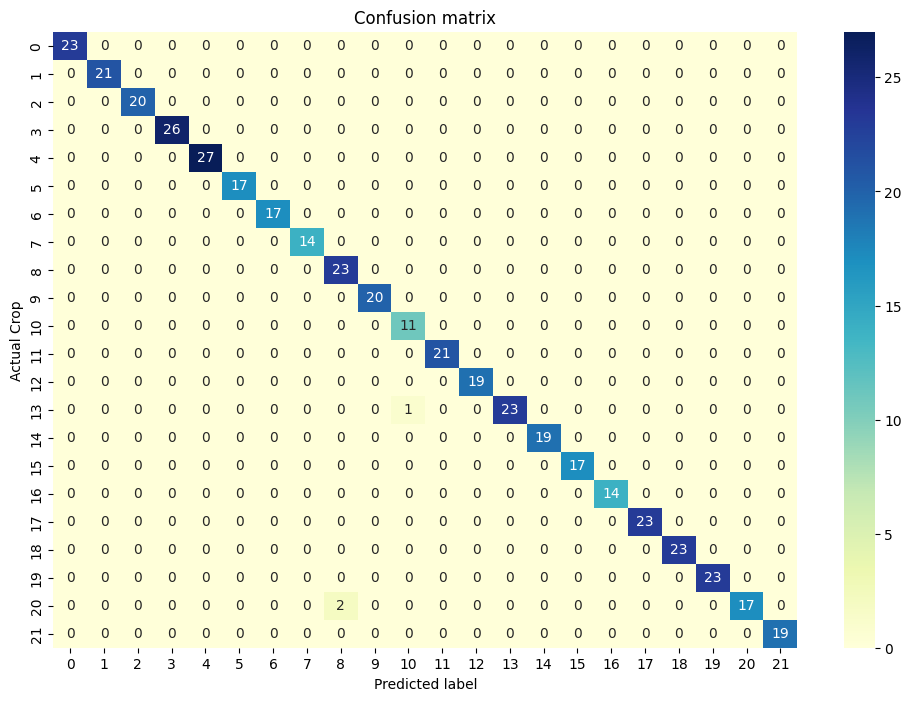

In [41]:
y_prediction = model.predict(X_test)

accuracy = accuracy_score(y_test, y_prediction)
print(f'Model accuracy: {accuracy * 100:.2f} %')
print('\n Classification report:')
print(classification_report(y_test, y_prediction))
cm = confusion_matrix(y_test, y_prediction)

plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt = 'd', cmap='YlGnBu')
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual Crop')
plt.show()

In [ ]:
def predict_crop_from_input():
    print("Enter the following values:")

    N = float(input("Nitrogen (N): "))
    P = float(input("Phosphorus (P): "))
    K = float(input("Potassium (K): "))
    temperature = float(input("Temperature (C): "))
    humidity = float(input("Humidity (%): "))
    ph = float(input("pH level: "))
    rainfall = float(input("Rainfall (mm): "))

    input_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])

    # Make prediction
    predicted_crop = model.predict(input_data)[0]

    print(f"\n🌾 Based on the values entered, the recommended crop is: **{predicted_crop.upper()}**")
